

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*


------

# Objective 

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning. 

In [1]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [2]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [3]:
def load_quickdraw10():
    """
    Returns a shuffled feature and target array
    
    Parameters
    ----------
    None
    
    Returns
    -------
    X: the feature array
    Y: the target array
    """
    
    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"
    
    path_to_zip = tf.keras.utils.get_file('./quickdraw10.npz', origin=URL_, extract=False)

    data = np.load(path_to_zip)

    X = data['arr_0']
    Y = data['arr_1']
        
    return train_test_split(X, Y, shuffle=True)

In [4]:
X_train, X_test, y_train, y_test = load_quickdraw10()

In [5]:
n_labels = len(np.unique(y_train))

----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. 

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer` 
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer 
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric 

We will use this function to build all the models that we'll need to run our experiments. 

In [6]:
X_train.shape

(75000, 784)

In [8]:
def create_model(lr=.01, opt="adam"):
    """
    
    Build and returns a compiled Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """

    if opt == "adam":
        opt = Adam(learning_rate=lr)
    elif opt == 'sgd':
        opt = SGD(learning_rate=lr)
    else:
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)

    # build model here
    model = Sequential()
    model.add(Dense(input_dim=X_train.shape[1], units=250, activation='sigmoid'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
    
    


In [10]:
dir(Sequential())

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [11]:
# a check on model architecture
model = create_model()
n_layers = len(model.get_config()["layers"])
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]

assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output act funct should be softmax"

------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training identifical models on a normalized data set and on a non-normalized data set. 

Then we will 

- Analyze the trained weight values of our model 
- Plot

In [12]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [14]:
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32,  
          callbacks=[tensorboard])

Epoch 1/10


2021-07-24 14:31:51.774642: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:31:51.774655: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:31:51.774883: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


 136/2344 [>.............................] - ETA: 3s - loss: 1.5185 - accuracy: 0.5159

2021-07-24 14:31:52.065272: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:31:52.065286: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:31:52.088184: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 14:31:52.088969: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 14:31:52.089869: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/No_Normalization-20210724-143151/train/plugins/profile/2021_07_24_14_31_52
2021-07-24 14:31:52.090487: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/No_Normalization-20210724-143151/train/plugins/profile/2021_07_24_14_31_52/Petrs-MBP.trace.json.gz
2021-07-24 14:31:52.091675: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/No_Normali

2344/2344 [==============================] - 3s 1ms/step - loss: 0.9576 - accuracy: 0.7047 - val_loss: 0.8820 - val_accuracy: 0.7256
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8107 - accuracy: 0.7499 - val_loss: 0.8027 - val_accuracy: 0.7536
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7803 - accuracy: 0.7568 - val_loss: 0.7799 - val_accuracy: 0.7569
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7595 - accuracy: 0.7646 - val_loss: 0.7834 - val_accuracy: 0.7549
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7460 - accuracy: 0.7680 - val_loss: 0.7510 - val_accuracy: 0.7687
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7211 - accuracy: 0.7760 - val_loss: 0.7297 - val_accuracy: 0.7730
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7144 - accuracy: 0.7783 - val_loss: 0.7184 - val_accuracy: 0.7747
Epo

---------

### Fit Model on Normalized data

In [15]:
# Normalize your training and test sets 
# save normalized data to X_train_scaled and X_test_scaled

# YOUR CODE HERE
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=.001, opt="adam")

norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          callbacks=[tensorboard])

2021-07-24 14:32:23.401987: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:32:23.402005: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:32:23.402339: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/10
 121/2344 [>.............................] - ETA: 3s - loss: 1.3487 - accuracy: 0.5943

2021-07-24 14:32:24.230694: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:32:24.230711: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:32:24.255384: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 14:32:24.256151: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 14:32:24.257134: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210724-143223/train/plugins/profile/2021_07_24_14_32_24
2021-07-24 14:32:24.257815: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210724-143223/train/plugins/profile/2021_07_24_14_32_24/Petrs-MBP.trace.json.gz
2021-07-24 14:32:24.259223: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20

2344/2344 [==============================] - 3s 1ms/step - loss: 0.7696 - accuracy: 0.7719 - val_loss: 0.6341 - val_accuracy: 0.8106
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5517 - accuracy: 0.8374 - val_loss: 0.5292 - val_accuracy: 0.8409
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4685 - accuracy: 0.8612 - val_loss: 0.4900 - val_accuracy: 0.8539
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4133 - accuracy: 0.8780 - val_loss: 0.4629 - val_accuracy: 0.8617
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3715 - accuracy: 0.8900 - val_loss: 0.4425 - val_accuracy: 0.8696
Epoch 6/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.3356 - accuracy: 0.9012 - val_loss: 0.4311 - val_accuracy: 0.8726
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.9111 - val_loss: 0.4371 - val_accuracy: 0.8717
Epo

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distribtuions on tensorboard. 

Assuming that you've ran `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be 
- dense_2
- dense_3

The name of the layers for `norm_model` should be 
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Protip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernal. 

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [18]:
norm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


### Tensorboard 

- Run the cell below to launch tensorboard 
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights 

In [19]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 19924), started 1 day, 21:36:48 ago. (Use '!kill 19924' to kill it.)

### Tensorboard 

Check out the loss and accuracy plots on the `SCALARS` tab. 

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data. 

Recall that what we are doing whenever training a model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer. 

Now click on the `HISTOGRAM` tab. 

You should see both of your model's layer names. 

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`). 

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernal distributions are the weight values.** 

The `bias` distributions are the bias values. 

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribuion in the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing show 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.** 

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalize data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`. 

Now it's time to analyze those weight values more closely. 

----------
### Analyze Weights in Each Layer

In [20]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_6")
bias, weights = layer.get_weights()

In [21]:
# get the final  value bias and weight magrices for norm_model
layer = norm_model.get_layer(name="dense_8")
bias_norm, weights_norm = layer.get_weights()

In [22]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test 
assert weights.shape[0] == weights_norm.shape[0]

### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/). 

The cell below is sampling values from the GlorotUniform distribution. Let's sample from the GlorotUniform distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts upading their values at training time. 

In [23]:
# let's take 250 random samples form the GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different 
# 250 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 250))

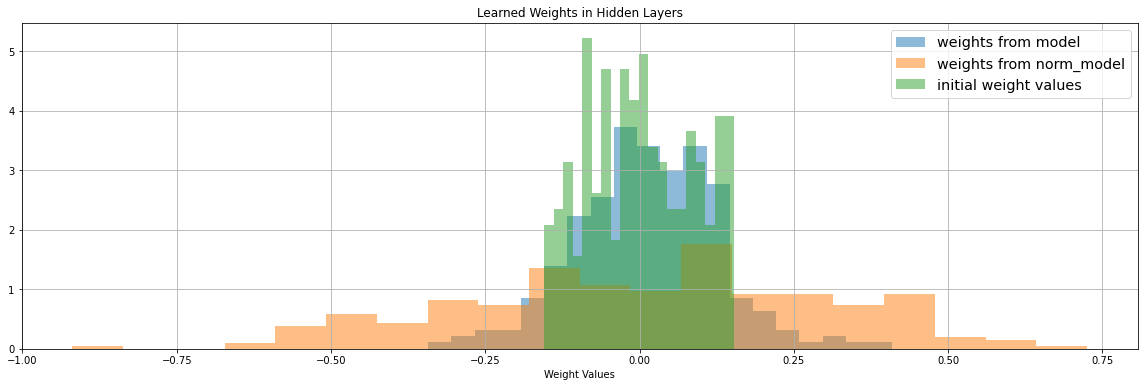

In [24]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions 
plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions 

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

The weights distribution increased marginally but not significantly. It is as if using gradient descent on non-normalised data resulted in very small incremental deviations from the initialised values.

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

Using normalized data resulted in gradient descent changing the weights by a relatively large amount when compared with the non-normalized data model. It is as if the act of normalizing the features to be between 0 and 1 resulted in larger incremental additions and subtractions to the node weights. 

**Using your understand of how Gradient Descent works, why do you think that the distributions between weights_from_model and weights_from_norm_model look so different?**

It is clear that the weights learned by the norm_model are larger in abolute terms, on average, than the regular model. In addition the model_norm weights are motre widley distributed between -1 and 1, indicating the adjustments made by gradient descent varied greatly from node to node when each node toom inputs ranging from 0 and 1 instead of the non-normalise 1 - 255. 

I believe these two distributionsa re different because the model_norm converged more quickly on optimal parameters. By normalising the input pixels, our model has a smoother cost function to chain-differentiate at each layer and node, thus reaching  higher parameter values (in absolute terms) with the same number of epochs. In contrast the non-normalised model cost function would need to be trained for many more epochs to reach get closer to the minimum of the cost function.

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effect that certain values for Batch Size, Learning Rate, and different Optimizers have on model accuracy. 

Using our **create_model** model building function, conduct the following experiments. 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [32]:
mnow = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"bs_1-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_bs_1 = create_model(lr=.001, opt="adam")

model_bs_1.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=2, 
          callbacks=[tensorboard])

2021-07-24 14:52:35.078711: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:52:35.078728: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:52:35.079247: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
  173/37500 [..............................] - ETA: 43s - loss: 1.7913 - accuracy: 0.3960   

2021-07-24 14:52:35.544188: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:52:35.544220: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:52:35.568798: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 14:52:35.569604: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 14:52:35.570504: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_1-20210724-145104/train/plugins/profile/2021_07_24_14_52_35
2021-07-24 14:52:35.571065: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/bs_1-20210724-145104/train/plugins/profile/2021_07_24_14_52_35/Petrs-MBP.trace.json.gz
2021-07-24 14:52:35.572002: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_1-20210724-145104/train/plugins

37500/37500 [==============================] - 38s 1ms/step - loss: 0.6290 - accuracy: 0.8091 - val_loss: 0.5315 - val_accuracy: 0.8397
Epoch 2/5
37500/37500 [==============================] - 39s 1ms/step - loss: 0.4528 - accuracy: 0.8639 - val_loss: 0.5049 - val_accuracy: 0.8527
Epoch 3/5
37500/37500 [==============================] - 39s 1ms/step - loss: 0.3839 - accuracy: 0.8856 - val_loss: 0.5094 - val_accuracy: 0.8553
Epoch 4/5
37500/37500 [==============================] - 39s 1ms/step - loss: 0.3362 - accuracy: 0.8986 - val_loss: 0.4849 - val_accuracy: 0.8622
Epoch 5/5
37500/37500 [==============================] - 40s 1ms/step - loss: 0.2928 - accuracy: 0.9114 - val_loss: 0.5234 - val_accuracy: 0.8584


In [33]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"bs_2-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_bs_2 = create_model(lr=.001, opt="adam")

model_bs_2.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=16, 
          callbacks=[tensorboard])

2021-07-24 14:55:49.966980: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:55:49.967000: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:55:49.967361: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
 152/4688 [..............................] - ETA: 6s - loss: 1.3757 - accuracy: 0.5765

2021-07-24 14:55:50.421448: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:55:50.421471: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:55:50.444190: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 14:55:50.444941: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 14:55:50.445890: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_2-20210724-145549/train/plugins/profile/2021_07_24_14_55_50
2021-07-24 14:55:50.446404: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/bs_2-20210724-145549/train/plugins/profile/2021_07_24_14_55_50/Petrs-MBP.trace.json.gz
2021-07-24 14:55:50.447492: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_2-20210724-145549/train/plugins

4688/4688 [==============================] - 6s 1ms/step - loss: 0.7226 - accuracy: 0.7844 - val_loss: 0.5845 - val_accuracy: 0.8264
Epoch 2/5
4688/4688 [==============================] - 5s 1ms/step - loss: 0.5046 - accuracy: 0.8502 - val_loss: 0.5218 - val_accuracy: 0.8406
Epoch 3/5
4688/4688 [==============================] - 5s 1ms/step - loss: 0.4251 - accuracy: 0.8729 - val_loss: 0.4702 - val_accuracy: 0.8612
Epoch 4/5
4688/4688 [==============================] - 6s 1ms/step - loss: 0.3721 - accuracy: 0.8882 - val_loss: 0.4606 - val_accuracy: 0.8609
Epoch 5/5
4688/4688 [==============================] - 6s 1ms/step - loss: 0.3286 - accuracy: 0.9016 - val_loss: 0.4595 - val_accuracy: 0.8641


In [34]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"bs_3-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_bs_3 = create_model(lr=.001, opt="adam")

model_bs_3.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=64, 
          callbacks=[tensorboard])

2021-07-24 14:56:18.494705: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:56:18.494723: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:56:18.495329: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
  72/1172 [>.............................] - ETA: 3s - loss: 1.4654 - accuracy: 0.5688

2021-07-24 14:56:19.246229: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:56:19.246248: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:56:19.284148: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 14:56:19.285376: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 14:56:19.287399: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_3-20210724-145618/train/plugins/profile/2021_07_24_14_56_19
2021-07-24 14:56:19.288029: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/bs_3-20210724-145618/train/plugins/profile/2021_07_24_14_56_19/Petrs-MBP.trace.json.gz
2021-07-24 14:56:19.289296: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_3-20210724-145618/train/plugins

1172/1172 [==============================] - 2s 2ms/step - loss: 0.8270 - accuracy: 0.7579 - val_loss: 0.6813 - val_accuracy: 0.8009
Epoch 2/5
1172/1172 [==============================] - 2s 2ms/step - loss: 0.6050 - accuracy: 0.8228 - val_loss: 0.5905 - val_accuracy: 0.8248
Epoch 3/5
1172/1172 [==============================] - 2s 2ms/step - loss: 0.5164 - accuracy: 0.8486 - val_loss: 0.5298 - val_accuracy: 0.8410
Epoch 4/5
1172/1172 [==============================] - 2s 2ms/step - loss: 0.4605 - accuracy: 0.8644 - val_loss: 0.4907 - val_accuracy: 0.8548
Epoch 5/5
1172/1172 [==============================] - 2s 2ms/step - loss: 0.4187 - accuracy: 0.8767 - val_loss: 0.4767 - val_accuracy: 0.8561


In [35]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"bs_4-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_bs_4 = create_model(lr=.001, opt="adam")

model_bs_4.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=256, 
          callbacks=[tensorboard])

2021-07-24 14:56:28.947747: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:56:28.947759: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:56:28.948087: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
 82/293 [=======>......................] - ETA: 0s - loss: 1.2655 - accuracy: 0.6436

2021-07-24 14:56:29.393308: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:56:29.393323: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:56:29.417387: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 14:56:29.418192: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 14:56:29.419069: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_4-20210724-145628/train/plugins/profile/2021_07_24_14_56_29
2021-07-24 14:56:29.419562: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/bs_4-20210724-145628/train/plugins/profile/2021_07_24_14_56_29/Petrs-MBP.trace.json.gz
2021-07-24 14:56:29.420622: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_4-20210724-145628/train/plugins

293/293 [==============================] - 1s 3ms/step - loss: 0.9636 - accuracy: 0.7227 - val_loss: 0.7933 - val_accuracy: 0.7666
Epoch 2/5
293/293 [==============================] - 1s 3ms/step - loss: 0.7280 - accuracy: 0.7880 - val_loss: 0.7023 - val_accuracy: 0.7952
Epoch 3/5
293/293 [==============================] - 1s 3ms/step - loss: 0.6453 - accuracy: 0.8127 - val_loss: 0.6367 - val_accuracy: 0.8116
Epoch 4/5
293/293 [==============================] - 1s 3ms/step - loss: 0.5847 - accuracy: 0.8301 - val_loss: 0.5928 - val_accuracy: 0.8238
Epoch 5/5
293/293 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.8429 - val_loss: 0.5527 - val_accuracy: 0.8342


In [40]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"bs_5-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_bs_5 = create_model(lr=.001, opt="adam")

model_bs_5.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=1000, 
          callbacks=[tensorboard])

2021-07-24 14:59:26.750573: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:59:26.750589: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:59:26.751720: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
36/75 [=============>................] - ETA: 0s - loss: 1.5397 - accuracy: 0.5666

2021-07-24 14:59:27.232105: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 14:59:27.232146: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 14:59:27.261303: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 14:59:27.262080: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 14:59:27.263184: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_5-20210724-145926/train/plugins/profile/2021_07_24_14_59_27
2021-07-24 14:59:27.264197: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/bs_5-20210724-145926/train/plugins/profile/2021_07_24_14_59_27/Petrs-MBP.trace.json.gz
2021-07-24 14:59:27.265940: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/bs_5-20210724-145926/train/plugins

75/75 [==============================] - 1s 11ms/step - loss: 1.2635 - accuracy: 0.6440 - val_loss: 0.9474 - val_accuracy: 0.7257
Epoch 2/5
75/75 [==============================] - 1s 7ms/step - loss: 0.8688 - accuracy: 0.7493 - val_loss: 0.8427 - val_accuracy: 0.7562
Epoch 3/5
75/75 [==============================] - 0s 6ms/step - loss: 0.7948 - accuracy: 0.7700 - val_loss: 0.7901 - val_accuracy: 0.7678
Epoch 4/5
75/75 [==============================] - 1s 7ms/step - loss: 0.7477 - accuracy: 0.7835 - val_loss: 0.7514 - val_accuracy: 0.7789
Epoch 5/5
75/75 [==============================] - 1s 7ms/step - loss: 0.7075 - accuracy: 0.7943 - val_loss: 0.7150 - val_accuracy: 0.7916


### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [42]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"lr_1-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_lr_1 = create_model(lr=.001, opt="adam")

model_lr_1.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=32, 
          callbacks=[tensorboard])

2021-07-24 15:01:17.039963: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:01:17.039981: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:01:17.040454: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
 117/2344 [>.............................] - ETA: 3s - loss: 1.4043 - accuracy: 0.5793

2021-07-24 15:01:17.538562: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:01:17.538588: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:01:17.561940: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 15:01:17.562908: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 15:01:17.564084: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_1-20210724-150117/train/plugins/profile/2021_07_24_15_01_17
2021-07-24 15:01:17.564985: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/lr_1-20210724-150117/train/plugins/profile/2021_07_24_15_01_17/Petrs-MBP.trace.json.gz
2021-07-24 15:01:17.566355: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_1-20210724-150117/train/plugins

2344/2344 [==============================] - 3s 1ms/step - loss: 0.7752 - accuracy: 0.7714 - val_loss: 0.6233 - val_accuracy: 0.8165
Epoch 2/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5518 - accuracy: 0.8363 - val_loss: 0.5314 - val_accuracy: 0.8423
Epoch 3/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4662 - accuracy: 0.8613 - val_loss: 0.4946 - val_accuracy: 0.8528
Epoch 4/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4116 - accuracy: 0.8781 - val_loss: 0.4664 - val_accuracy: 0.8615
Epoch 5/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3701 - accuracy: 0.8912 - val_loss: 0.4423 - val_accuracy: 0.8672


In [43]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"lr_2-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_lr_2 = create_model(lr=.01, opt="adam")

model_lr_2.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=32, 
          callbacks=[tensorboard])

2021-07-24 15:01:32.426670: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:01:32.426697: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:01:32.427436: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
 112/2344 [>.............................] - ETA: 4s - loss: 1.0861 - accuracy: 0.6476

2021-07-24 15:01:32.879478: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:01:32.879498: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:01:32.909061: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 15:01:32.909907: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 15:01:32.910806: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_2-20210724-150132/train/plugins/profile/2021_07_24_15_01_32
2021-07-24 15:01:32.911376: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/lr_2-20210724-150132/train/plugins/profile/2021_07_24_15_01_32/Petrs-MBP.trace.json.gz
2021-07-24 15:01:32.912424: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_2-20210724-150132/train/plugins

2344/2344 [==============================] - 3s 1ms/step - loss: 0.6540 - accuracy: 0.8000 - val_loss: 0.5946 - val_accuracy: 0.8202
Epoch 2/5
2344/2344 [==============================] - 4s 2ms/step - loss: 0.5344 - accuracy: 0.8391 - val_loss: 0.5572 - val_accuracy: 0.8352
Epoch 3/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4975 - accuracy: 0.8493 - val_loss: 0.5512 - val_accuracy: 0.8367
Epoch 4/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4697 - accuracy: 0.8592 - val_loss: 0.5670 - val_accuracy: 0.8339
Epoch 5/5
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4516 - accuracy: 0.8631 - val_loss: 0.5499 - val_accuracy: 0.8398


In [44]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"lr_3-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_lr_3 = create_model(lr=.05, opt="adam")

model_lr_3.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=32, 
          callbacks=[tensorboard])

2021-07-24 15:01:49.976394: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:01:49.976408: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:01:49.977237: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
  68/2344 [..............................] - ETA: 5s - loss: 1.4575 - accuracy: 0.5588

2021-07-24 15:01:50.980857: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:01:50.980874: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:01:51.009225: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 15:01:51.010325: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 15:01:51.012078: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_3-20210724-150149/train/plugins/profile/2021_07_24_15_01_51
2021-07-24 15:01:51.013725: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/lr_3-20210724-150149/train/plugins/profile/2021_07_24_15_01_51/Petrs-MBP.trace.json.gz
2021-07-24 15:01:51.015238: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_3-20210724-150149/train/plugins

2344/2344 [==============================] - 5s 2ms/step - loss: 0.9410 - accuracy: 0.7136 - val_loss: 0.8203 - val_accuracy: 0.7538
Epoch 2/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8730 - accuracy: 0.7369 - val_loss: 0.9128 - val_accuracy: 0.7370
Epoch 3/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8535 - accuracy: 0.7460 - val_loss: 0.7946 - val_accuracy: 0.7578
Epoch 4/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8294 - accuracy: 0.7526 - val_loss: 0.8773 - val_accuracy: 0.7405
Epoch 5/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8112 - accuracy: 0.7609 - val_loss: 0.8161 - val_accuracy: 0.7542


In [45]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"lr_4-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_lr_4 = create_model(lr=.1, opt="adam")

model_lr_4.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=32, 
          callbacks=[tensorboard])

2021-07-24 15:02:07.715774: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:02:07.715788: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:02:07.716308: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
 139/2344 [>.............................] - ETA: 3s - loss: 1.7565 - accuracy: 0.5058

2021-07-24 15:02:08.775370: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:02:08.775385: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:02:08.801784: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 15:02:08.802695: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 15:02:08.803762: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_4-20210724-150207/train/plugins/profile/2021_07_24_15_02_08
2021-07-24 15:02:08.804645: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/lr_4-20210724-150207/train/plugins/profile/2021_07_24_15_02_08/Petrs-MBP.trace.json.gz
2021-07-24 15:02:08.806048: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_4-20210724-150207/train/plugins

2344/2344 [==============================] - 4s 1ms/step - loss: 1.1202 - accuracy: 0.6558 - val_loss: 1.0470 - val_accuracy: 0.6686
Epoch 2/5
2344/2344 [==============================] - 3s 1ms/step - loss: 1.0091 - accuracy: 0.6928 - val_loss: 1.0307 - val_accuracy: 0.6950
Epoch 3/5
2344/2344 [==============================] - 4s 2ms/step - loss: 0.9636 - accuracy: 0.7147 - val_loss: 0.9301 - val_accuracy: 0.7359
Epoch 4/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9829 - accuracy: 0.7131 - val_loss: 0.9598 - val_accuracy: 0.7104
Epoch 5/5
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9366 - accuracy: 0.7225 - val_loss: 0.9494 - val_accuracy: 0.7344


In [46]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"lr_5-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)


model_lr_5 = create_model(lr=.5, opt="adam")

model_lr_5.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=5, 
          batch_size=32, 
          callbacks=[tensorboard])

2021-07-24 15:02:25.194015: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:02:25.194047: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:02:25.194353: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/5
 137/2344 [>.............................] - ETA: 3s - loss: 12.3088 - accuracy: 0.3501

2021-07-24 15:02:25.610042: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-24 15:02:25.610057: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-24 15:02:25.632716: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-24 15:02:25.633514: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-24 15:02:25.634402: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_5-20210724-150225/train/plugins/profile/2021_07_24_15_02_25
2021-07-24 15:02:25.634949: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/lr_5-20210724-150225/train/plugins/profile/2021_07_24_15_02_25/Petrs-MBP.trace.json.gz
2021-07-24 15:02:25.636016: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/lr_5-20210724-150225/train/plugins

2344/2344 [==============================] - 4s 1ms/step - loss: 5.8180 - accuracy: 0.4216 - val_loss: 4.8006 - val_accuracy: 0.4286
Epoch 2/5
2344/2344 [==============================] - 3s 1ms/step - loss: 5.1011 - accuracy: 0.4827 - val_loss: 5.1474 - val_accuracy: 0.4524
Epoch 3/5
2344/2344 [==============================] - 3s 1ms/step - loss: 4.8384 - accuracy: 0.5042 - val_loss: 4.5908 - val_accuracy: 0.5992
Epoch 4/5
2344/2344 [==============================] - 3s 1ms/step - loss: 5.0620 - accuracy: 0.5054 - val_loss: 7.4124 - val_accuracy: 0.4613
Epoch 5/5
2344/2344 [==============================] - 4s 1ms/step - loss: 5.4677 - accuracy: 0.4949 - val_loss: 4.3820 - val_accuracy: 0.5536


### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [41]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 19924), started 1 day, 22:02:42 ago. (Use '!kill 19924' to kill it.)

------

## Stretch Goals: 

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent. 